#ML-Exercise

##A Fund Raising Revenue Prediction Model


###BACKGROUND AND OBJECTIVES

The data set for this exercise are the results of a fund raising effort. Requests for donations to aid US veterans were mailed (referred to as 97NK mailing) to a large set of people who have donated to a similar cause in the past.

The data set for this exercise includes a large number of features about the set of people who were mailed a request as well as two response variables called ‘Target_B’ and ‘Target_D’. 

‘Target_B’ refers to whether the member responded to the request.  
‘Target_D’ is the dollar amount of the member’s donation if the user donated.

Your goal is build a model that can improve the cost-effectiveness of future direct marketing effort by maximizing the net revenue (a regression or estimation task) generated from mailing another set of donation requests.

###DATA DISTRIBUTION

The training and testing files include 191,779 donors who received the mailing. 

The overall response rate for this direct mail promotion is 5.1%.  The distribution of the target fields in the learning files is as follows:


Learning Data Set
Target Variable: Binary Indicator of Response to 97NK Mailing
  
| TARGET_B | Frequency | Percent | Cumulative Frequency | Cumulative Percent |
|----------|:---------:|--------:|----------------------|--------------------|
|     0    |   90569   |   94.9  |         90569        |        94.9        |
|     1    |    4843   |   5.1   |         95412        |        100.0       |

Learning Data Set
Target Variable: Donation Amount (in $) to 97NK Mailing   

| Variable |   N   |    Mean   | Minimum | Maximum |
|:--------:|:-----:|:---------:|:-------:|:-------:|
| TARGET_D | 95412 | 0.7930732 |    0    |  200.0  |


The average donation amount (in $) among the responders is: 

Learning Data Set
Target Variable: Donation Amount (in $) to 97NK Mailing  

|   N  |    Mean    | Minimum | Maximum |
|:----:|:----------:|:-------:|:-------:|
| 4843 | 15.6243444 |   1.0   |  200.0  |

###DATA SOURCES AND ORDER & TYPE OF THE VARIABLES IN THE DATA SETS

The dataset includes:

o 24 months of detailed promotion and giving history (covering the
  period 12 to 36 months prior to the "97NK" mailing)

o A summary of the promotions sent to the donors over the most recent
  12 months prior to the "97NK" mailing (none of these
  donors responded to any of these promotions)

o Summary variables reflecting each donor's lifetime giving history
  (e.g., total # of donations prior to "97NK" mailing, total $ amount
  of the donations, etc.)

o Overlay demographics, including a mix of household and area level
  data

o All other available data (e.g., date of first
  gift, state, origin source, etc.)

###EVALUATION RULES

There are two separate pieces to the submission. The first is the code along with documentation describing your analysis and model building process. The other is a file containing predictions on the testing set. Each prediction should be a line with the unique record identifier (field name: CONTROLN) along with the prediction value. The code along with a documentation of your thought process is more important than the prediction file.

The objective of the analysis will be to maximize the net revenue generated from the mailed promotions according to the testing set. The response variable is, thus, continuous (for the lack of a better common term). Although we are releasing both the binary and the continuous versions of the target variable (TARGET_B and TARGET_D respectively), the predicted value of the donation (dollar) amount (for the target variable TARGET_D) will be used for evaluating the results. So, returning the predicted value of the binary target variable TARGET_B and its associated probability/strength will not be sufficient. 

The typical outcome of predictive modeling in database marketing is an estimate of the expected response/return per customer in the database. A marketer will mail to a customer so long as the expected return from an order exceeds the cost invested in generating the order, i.e., the cost of promotion. For our purpose, the package cost (including the mail cost) is $0.68 per piece mailed. 

The evaluation of the results will be based solely on the net revenue generated on the hold-out or validation sample.

The measure we will use is:

Sum (the actual donation amount - \$0.68) over all records for which the expected revenue (or predicted value of the donation) is over \$0.68.


This is a direct measure of profit.

###ADDITIONAL INFORMATION

1. This data set contains a large number of features. Part of the challenge is finding ways to deal with a large numbers of features which you might not know the meaning of.

2. Some of the fields in the analysis file may contain data entry and/or formatting errors. Cleaning the data is not the purpose of this exercise. We are more interested in your approach to the overall problem than the actual performance of your model, so don’t spend much time cleaning data even if you think it will hurt your model’s performance.

3. The data sets are in comma delimited format. The learning dataset (train_set) contains 95412 records and 481 variables. The first/header row of the data set contains the field names. 

    The validation dataset (testing_set) contains 96367 records and 479 variables. The first/header row of the data set contains the field names. 

    THE RECORDS IN THE VALIDATION DATASET ARE IDENTICAL TO THE RECORDS IN THE LEARNING DATASET EXCEPT THAT THE VALUES FOR THE TARGET/DEPENDENT VARIABLES ARE MISSING (i.e., the fields TARGET_B and TARGET_D are not included in the validation data set.)<br><br>

4. The data dictionary (for both the learning and the validation data set) is included in the file (data_details). The fields in the data dictionary are ordered by the position of the fields in the learning data set. The dictionary for the validation data set is identical to the dictionary for the learning data set except the two target fields (target_B and target_D) are missing in the validation data set.

5. Blanks in the string (or character) variables/fields and periods in the numeric variables correspond to missing values.

6. Each record has a unique record identifier or index (field name: CONTROLN.) For each record, there are two target/dependent variables (field names: TARGET_B and TARGET_D). TARGET_B is a binary variable indicating whether or not the record responded to the promotion of interest ("97NK" mailing) while TARGET_D contains the donation amount (dollar) and is only observed for those that responded to the promotion. Neither of these should be used to train the model. Each record in the returned file should consist of the following two values:

    a. The unique record identifier or index (field name: CONTROLN)
        
    b. Predicted value of the donation (dollar) amount (for the target variable TARGET_D) for that record 

###DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
full_data = pd.read_csv('cup98LRN.txt',dtype={'NOEXCH':str}) 
# Got a warning that NoExch is a mixed type column, upon examining it, it had the numbers 1 and 0 as both a string and int
# for the purposes of dummying this column, I imported the values as strings

First thing is to take a look at the features provided in this dataset. The data details document divides the 481 features into 13 categories.

####1st Category:

Variables:
    
 'ODATEDW',
 'OSOURCE',
 'TCODE',
 'STATE',
 'ZIP',
 'MAILCODE',
 'PVASTATE',
 'DOB',
 'NOEXCH',
 'RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'MDMAUD',
 'DOMAIN',
 'CLUSTER',
 'AGE',
 'AGEFLAG',
 'HOMEOWNR',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'NUMCHLD',
 'INCOME',
 'GENDER',
 'WEALTH1',
 'HIT'
    

The first category is primarily demographic information concerning the donor. Their state, zip, dob, are they a homeowner, number of children, etc. 

The ODATEDW feature is the date of the donor's first gift and is in the form YYMM. This will need to be converted to datetime if lenth of months between dates is to be found.

The MDMAUD feature is likely of value due to it containing RFM analysis and will need to be split up and dummied out.

The DOMAIN feature is used for Socio-Economic status clustering and will need to be dummied out.

The HIT field refers to the total number of known times the donor has responded to a mail order offer and is likely valuable to include.

In [3]:
len(full_data['ZIP'].value_counts())

19938

Ouch. So dummying out the ZIP column will chew through our degrees of freedom like a knife through butter...hopeful other features will provide the same similarity information normally obtained from the zipcode.

####2nd Category:

Variables:
 
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP'

The second category is the number of times the donor has responded to other types of mailing offers. Does appear to be sparely filled though and unlikely to be useful.

In [4]:
full_data['MBCRAFT'].value_counts(dropna=False)

NaN    52854
 0     37707
 1      3521
 2      1079
 3       215
 4        33
 5         2
 6         1
dtype: int64

####3rd Category:

Variables:

 'DATASRCE',
 'MALEMILI',
 'MALEVET',
 'VIETVETS',
 'WWIIVETS',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'SOLP3',
 'SOLIH',
 'MAJOR',
 'WEALTH2',
 'GEOCODE'

The third category has data that appears to be very important, such as percent males that are veterans. It doesn't state if this is percent males of the household, but it is likely this information came from the census data captured under the 6th category of features.

There are also fields for solicitation limits on the household. Although these are sparely filled...in terms of a model, these donors might need to be removed if they will not accept a request for donation. However, they were clearly sent a 97NK so these fields area likely useless. 

In [5]:
full_data['SOLP3'].value_counts(dropna=False)

       95232
00        80
12        72
01        18
02        10
NaN        0
dtype: int64

####4th Category:

Variables:

 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'LIFESRC'

The fourth category contains data on donor interests in Y/N form. The field for veterans seems relevant and these can be converted from Y/N to binary 1/0 fairly easily.

####5th Category:

Variables:

'PEPSTRFL'

The fifth category is just a field for if the donor is a PEP star. This should also be captured in the RFA fields as S=STAR DONOR STAR Donors are individuals who have given to 3 consecutive card mailings.

There are donors flagged as star donors in the RFM analysis but not in the PEPSTRFL field.

In [6]:
full_data['PEPSTRFL'].value_counts()

     50143
X    45269
dtype: int64

In [7]:
len(full_data[(full_data['PEPSTRFL']!='X') & (full_data['RFA_5'].str[0]=='S')])

5

####6th Category:

Variables:

'POP901' through 'AC2'

The sixth category is the majority of the fields in the data set and contains characteristics on the donor's neighborhood. This seems much more descriptive in terms of clustering than state or zip and can likely replace those fields. 

Almost all fields are numerical except for 3: MSA, ADI, DMA. These appear to be clustering codes. Rather than dummy these, I would prefer to use the other data in this category since it is likely of higher clustering importance than a government assigned code. The number of dummy columns required is also a factor.

In [8]:
len(full_data['MSA'].value_counts())

298

####7th Category:

Variables:

'ADATE_2',
 'ADATE_3',
 'ADATE_4',
 'ADATE_5',
 'ADATE_6',
 'ADATE_7',
 'ADATE_8',
 'ADATE_9',
 'ADATE_10',
 'ADATE_11',
 'ADATE_12',
 'ADATE_13',
 'ADATE_14',
 'ADATE_15',
 'ADATE_16',
 'ADATE_17',
 'ADATE_18',
 'ADATE_19',
 'ADATE_20',
 'ADATE_21',
 'ADATE_22',
 'ADATE_23',
 'ADATE_24',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_5',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_10',
 'RFA_11',
 'RFA_12',
 'RFA_13',
 'RFA_14',
 'RFA_15',
 'RFA_16',
 'RFA_17',
 'RFA_18',
 'RFA_19',
 'RFA_20',
 'RFA_21',
 'RFA_22',
 'RFA_23',
 'RFA_24'

The seventh category is RFM data on previous promotions with similar promotion features: labels, notepads, stickers.   

From this, I see that we are looking at a timeframe between '94 and '96 for previous promotions with the 97NK promotion being sent in june of '97 for almost all donors in the dataset.

In [9]:
full_data['ADATE_2'].value_counts()

9706    95399
9704       13
dtype: int64

####8th Category:

Variables:

 'CARDPROM',
 'MAXADATE',
 'NUMPROM',
 'CARDPM12',
 'NUMPRM12'

The eighth category contains summary information on the promotion history. It also specifically calls seperates out the number of card promotions vs all promotions. The 97NK promotion is a card promotion.

####9th Category:

Variables:

 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_8',
 'RDATE_9',
 'RDATE_10',
 'RDATE_11',
 'RDATE_12',
 'RDATE_13',
 'RDATE_14',
 'RDATE_15',
 'RDATE_16',
 'RDATE_17',
 'RDATE_18',
 'RDATE_19',
 'RDATE_20',
 'RDATE_21',
 'RDATE_22',
 'RDATE_23',
 'RDATE_24',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_8',
 'RAMNT_9',
 'RAMNT_10',
 'RAMNT_11',
 'RAMNT_12',
 'RAMNT_13',
 'RAMNT_14',
 'RAMNT_15',
 'RAMNT_16',
 'RAMNT_17',
 'RAMNT_18',
 'RAMNT_19',
 'RAMNT_20',
 'RAMNT_21',
 'RAMNT_22',
 'RAMNT_23',
 'RAMNT_24'

The ninth category is information concerning the giving from donors on the previous promotions, specifically the date and the amount. This is likely very important in terms of figuring out the donation amount of those predicted to donate in the 97NK promotion.

####10th Category:

Variables:

 'RAMNTALL',
 'NGIFTALL',
 'CARDGIFT',
 'MINRAMNT',
 'MINRDATE',
 'MAXRAMNT',
 'MAXRDATE',
 'LASTGIFT',
 'LASTDATE',
 'FISTDATE',
 'NEXTDATE',
 'TIMELAG',
 'AVGGIFT'

The tenth category contains summary variables on the previous donations. The LASTDATE, NGIFTALL and RAMNTALL features are what I would expect to be used in a RFM analysis breaking users up in quartiles. 

####11th Category:

Variables:

 'CONTROLN',
 'TARGET_B',
 'TARGET_D',
 'HPHONE_D' 

The eleventh category contains the unique ID and the two target variables: TARGET_B and TARGET_D.

####12th Category:

Variables:

 'RFA_2R',
 'RFA_2F',
 'RFA_2A',
 'MDMAUD_R',
 'MDMAUD_F',
 'MDMAUD_A'

The twelfth category is the RFA codes already broken out for the 97NK promotion and the Major Donor Matrix, making RFA_2 and MDMAUD redundent features.

####13th Category:

Variables:

 'CLUSTER2',
 'GEOCODE2'

The final category contains two additional clustering code features. 

###DATA CLEANING

Due to a large number of features in this dataset being nominal, symbolic or redundant, I chose to drop or convert these features before continuing.

From the data analysis, I know that the 97NK promotion was sent out in June 1997. I will therefore use that month and year as the 'now' for determining the number of months since the donor's first gift since just knowing the month and year of the first gift is not useful in my models.

In [10]:
from datetime import datetime
from dateutil import relativedelta

def months_between(date_in):
    # rough workaround to handle YYMM format by converting to number of months from then till now
    if len(str(date_in)) != 4:
        # handle dates with value 0
        return 0
    else:
        date_in = '19' + str(date_in)
        date1=datetime.strptime(date_in,'%Y%m')
        date2=datetime.strptime('199706','%Y%m') # assume now is June 1997
        r = relativedelta.relativedelta(date2,date1)
        return r.years*12 + r.months

In [11]:
full_data['MONTHS_SINCE_1st_GIFT'] = full_data.apply(lambda row: months_between(row['ODATEDW']),axis=1)
full_data.drop(['ODATEDW'],axis=1,inplace=True)

I viewed the following features in the 1st category as non-important based on their descriptions and chose to drop them, at least for my first pass on model building: 'OSOURCE', 'TCODE', 'MAILCODE', 'PVASTATE', 'NOEXCH', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'AGEFLAG', 'CHILD03','CHILD07', 'CHILD12', 'CHILD18', 'NUMCHLD'. It is possible that fields like 'RECINHSE' or 'RECP3' are important but without domain specific knowledge, I chose to not include them on my first pass.

I felt the important clustering information captured in 'STATE','ZIP' was also present in the census data in the 6th category, so chose to drop 'STATE','ZIP'.

In [12]:
cols_to_drop = ['OSOURCE','TCODE','STATE','ZIP','MAILCODE','PVASTATE','NOEXCH','RECINHSE','RECP3','RECPGVG','RECSWEEP','AGEFLAG'
               ,'CHILD03','CHILD07','CHILD12','CHILD18','NUMCHLD']
full_data.drop(cols_to_drop, axis=1, inplace=True)

I chose to drop 'DOB' given that the donor's age was also a feature in the dataset. But made sure to replace missing ages with 0.

In [13]:
full_data.drop('DOB', axis=1, inplace=True)
full_data['AGE'].fillna(value=0,inplace=True)

For the MDMAUD feature or Major Donor Matrix code, I was going to dummy out each field into a seperate column, however, after examination, only 294 donors had values and of these, only 15 actually gave money in the 97NK promotion. Therefore, I chose to drop the column and the 3 other columns that had already broken the fields out into RFM.  

In [14]:
print (len(full_data[(full_data['MDMAUD']!='XXXX')]))

print (len(full_data.ix[(full_data['MDMAUD']!='XXXX') & (full_data['TARGET_B']!=0)]))

294
15


In [15]:
cols_to_drop = ['MDMAUD_R','MDMAUD_F','MDMAUD_A','MDMAUD']
full_data.drop(cols_to_drop, axis=1, inplace=True)

Unlike 'ZIP', the 'DOMAIN' feature seemed a good representation of the Socio-Economic status of the donor's neighborhood so I chose to include this feature and dummy it out into several columns.

In [16]:
full_data = pd.concat([full_data, pd.get_dummies(full_data['DOMAIN'],prefix='SES_')], axis=1)
cols_to_drop = ['DOMAIN','SES__ ']
full_data.drop(cols_to_drop, axis=1, inplace=True)

I chose to drop the 'CLUSTER' field, as the socio-economic status of the donor's neighborhood had already been captured by the 'DOMAIN' dummy fields.

In [17]:
full_data.drop('CLUSTER', axis=1, inplace=True)

I felt 'HOMEOWNR' made sense as being representative of wealth and therefore more money to donate. I converted this column into a binary representation with 1 representing the donor being a homeowner and 0 being if this status is unknown.

In [18]:
def binary_map(incoming,yes_series):
    if str(incoming) in yes_series:
        s = 1  # convert to 1
    else:
        s = 0 # convert to 0
    return s

In [19]:
full_data['HOMEOWNR'] = full_data.apply(lambda row: binary_map(row['HOMEOWNR'],'H'),axis=1)

'INCOME' and 'WEALTH1' both contained numeric levels representing the donor's affluence and were retained from this category. They were dummied out with NaN's getting a 0 in each dummy column.

In [20]:
full_data = pd.concat([full_data, pd.get_dummies(full_data['INCOME'],prefix='INCOME_')], axis=1)
full_data = pd.concat([full_data, pd.get_dummies(full_data['WEALTH1'],prefix='WEALTH1_')], axis=1)
cols_to_drop = ['INCOME','WEALTH1']
full_data.drop(cols_to_drop, axis=1, inplace=True)

'HIT' was also retained as it represents the total number of known times the donor has responded to a mail order offer other than PVA's

'GENDER' is a categorical variable so was dummied out into Male and Female binary columns with unknown genders represented with a 0 in both the male and female columns. Unknown genders include C and A which were not explained in the data details document.

In [21]:
full_data = pd.concat([full_data, pd.get_dummies(full_data['GENDER'],prefix='GENDER_')], axis=1)
cols_to_drop = ['GENDER','GENDER__ ','GENDER__A','GENDER__C','GENDER__J','GENDER__U']
full_data.drop(cols_to_drop, axis=1, inplace=True)

I chose to drop all features from the 2nd category as they were unlikely to provide more information on the donor's donation habits for veterans than what is already captured by the promotional response data in the 10th category.

In [22]:
cols_to_drop = ['MBCRAFT','MBGARDEN','MBBOOKS','MBCOLECT','MAGFAML','MAGFEM','MAGMALE','PUBGARDN','PUBCULIN','PUBHLTH'
                ,'PUBDOITY','PUBNEWFN','PUBPHOTO','PUBOPP']
full_data.drop(cols_to_drop, axis=1, inplace=True)

I chose to only include the 'MALEMILI', 'MALEVET', 'VIETVETS', and 'WWIIVETS' features from the 3rd category of features. The other features seemed superfluous such as 'WEALTH2' which has a different meaning depending on the state of the donor.

In [23]:
cols_to_drop = ['DATASRCE','LOCALGOV','STATEGOV','FEDGOV','SOLP3','SOLIH','MAJOR','WEALTH2','GEOCODE']
full_data.drop(cols_to_drop, axis=1, inplace=True)

From the 4th category, donor interests in 'VETERANS' makes sense to include.

In [24]:
full_data['VETERANS'] = full_data.apply(lambda row: binary_map(row['VETERANS'],'Y'),axis=1)

In [25]:
cols_to_drop = ['COLLECT1','BIBLE','CATLG','HOMEE','PETS','CDPLAY','STEREO','PCOWNERS','PHOTO','CRAFTS','FISHER','GARDENIN'
                ,'BOATS','WALKER','KIDSTUFF','CARDS','PLATES','LIFESRC']
full_data.drop(cols_to_drop, axis=1, inplace=True)

The 5th category is just 'PEPSTRFL' but divides the donors in half between those that are and those that are not. I converted this feature into a binary classification.

In [26]:
full_data['PEPSTRFL'] = full_data.apply(lambda row: binary_map(row['PEPSTRFL'],'X'),axis=1)

There are probably too many features to choose from in the 6th category. Although including them all is an option, due to computational and time constraints, I chose to include 4: IC1: Median Household Income in hundreds, IC5: Per Capita Income, HV1: Median Home Value in hundreds, and HU1: Percent Owner Occupied Housing Units.

These assume homeowners in high valued and owned neighborhoods are more likely to donate.

In [27]:
cols_to_drop = ['POP901','POP902','POP903','POP90C1','POP90C2','POP90C3','POP90C4','POP90C5','ETH1','ETH2','ETH3','ETH4','ETH5'
                ,'ETH6','ETH7','ETH8','ETH9','ETH10','ETH11','ETH12','ETH13','ETH14','ETH15','ETH16','AGE901','AGE902','AGE903'
                ,'AGE904','AGE905','AGE906','AGE907','CHIL1','CHIL2','CHIL3','AGEC1','AGEC2','AGEC3','AGEC4','AGEC5','AGEC6'
                ,'AGEC7','CHILC1','CHILC2','CHILC3','CHILC4','CHILC5','HHAGE1','HHAGE2','HHAGE3','HHN1','HHN2','HHN3','HHN4'
                ,'HHN5','HHN6','MARR1','MARR2','MARR3','MARR4','HHP1','HHP2','DW1','DW2','DW3','DW4','DW5','DW6','DW7','DW8'
                ,'DW9','HV2','HV3','HV4','HU2','HU3','HU4','HU5','HHD1','HHD2','HHD3','HHD4','HHD5','HHD6','HHD7','HHD8','HHD9'
                ,'HHD10','HHD11','HHD12','ETHC1','ETHC2','ETHC3','ETHC4','ETHC5','ETHC6','HVP1','HVP2','HVP3','HVP4','HVP5'
                ,'HVP6','HUR1','HUR2','RHP1','RHP2','RHP3','RHP4','HUPA1','HUPA2','HUPA3','HUPA4','HUPA5','HUPA6','HUPA7'
                ,'RP1','RP2','RP3','RP4','MSA','ADI','DMA','IC2','IC3','IC4','IC6','IC7','IC8','IC9','IC10','IC11','IC12','IC13'
                ,'IC14','IC15','IC16','IC17','IC18','IC19','IC20','IC21','IC22','IC23','HHAS1','HHAS2','HHAS3','HHAS4','MC1'
                ,'MC2','MC3','TPE1','TPE2','TPE3','TPE4','TPE5','TPE6','TPE7','TPE8','TPE9','PEC1','PEC2','TPE10','TPE11','TPE12'
                ,'TPE13','LFC1','LFC2','LFC3','LFC4','LFC5','LFC6','LFC7','LFC8','LFC9','LFC10','OCC1','OCC2','OCC3','OCC4'
                ,'OCC5','OCC6','OCC7','OCC8','OCC9','OCC10','OCC11','OCC12','OCC13','EIC1','EIC2','EIC3','EIC4','EIC5','EIC6'
                ,'EIC7','EIC8','EIC9','EIC10','EIC11','EIC12','EIC13','EIC14','EIC15','EIC16','OEDC1','OEDC2','OEDC3','OEDC4'
                ,'OEDC5','OEDC6','OEDC7','EC1','EC2','EC3','EC4','EC5','EC6','EC7','EC8','SEC1','SEC2','SEC3','SEC4','SEC5'
                ,'AFC1','AFC2','AFC3','AFC4','AFC5','AFC6','VC1','VC2','VC3','VC4','ANC1','ANC2','ANC3','ANC4','ANC5','ANC6'
                ,'ANC7','ANC8','ANC9','ANC10','ANC11','ANC12','ANC13','ANC14','ANC15','POBC1','POBC2','LSC1','LSC2','LSC3'
                ,'LSC4','VOC1','VOC2','VOC3','HC1','HC2','HC3','HC4','HC5','HC6','HC7','HC8','HC9','HC10','HC11','HC12','HC13'
                ,'HC14','HC15','HC16','HC17','HC18','HC19','HC20','HC21','MHUC1','MHUC2','AC1','AC2']
full_data.drop(cols_to_drop, axis=1, inplace=True)

From the 7th category, the donor's FRM status as of the 97NK mailing date makes the most sense to include. Flucations between the RFM status's of the previous promotions are likely not as important. However, all accounts are considered lapsing donors in terms of the recency of the 97NK promotion. Therefore, the recency portion of the 96NK will be used instead. The Monetary portion is already captured in 'LASTGIFT' and therefore does not need to be pulled from 'RFA_2'.

In [28]:
full_data['RFA_2'].value_counts()

L1F    30380
L1G    12384
L2F    10961
L3E     7767
L2E     4989
L4D     4914
L1E     4911
L2G     4595
L4E     3972
L3F     3523
L3D     2498
L4F     2100
L3G     1503
L4G      915
dtype: int64

In [29]:
def rfa_map(incoming,position,match_val):
    if len(incoming) < 3:
        return 0 # handle blank values
    if incoming[position] == match_val:  # strings start at position 0
        s = 1  # convert to 1
    else:
        s = 0 # convert to 0
    return s

In [30]:
for i in ('F','N','A','L','I'):
    full_data['RFA_3_' + i] = full_data.apply(lambda row: rfa_map(row['RFA_3'],0,i),axis=1)
    
full_data = pd.concat([full_data, pd.get_dummies(full_data['RFA_2F'],prefix='RFA_2F_')], axis=1)

The only feature not of importance from the 8th category is 'MAXADATE'.

In [31]:
full_data.drop('MAXADATE', axis=1, inplace=True)

I used the features in the 9th category to create new summary features, specifically number of promotions per donor in the last 24 months, number of donations from the donor in the last 24 months, and the average amount donated in the last 24 months.

I checked to see if 'RAMNTALL' and 'NGIFTALL' were for the last 24 months but they were in fact for the lifetime of the donor.

In [32]:
full_data['SUM_GIFT_AMT'] = full_data.ix[:,'RAMNT_3':'RAMNT_24'].sum(axis=1).fillna(0)
full_data[['RAMNTALL','SUM_GIFT_AMT']].head()

,RAMNTALL,SUM_GIFT_AMT
0,240,73
1,47,37
2,202,58
3,109,65
4,254,25


In [33]:
full_data['NUM_PROMOTIONS'] = full_data.ix[:,'ADATE_3':'ADATE_24'].count(axis=1)
full_data['NUM_DONATIONS'] = full_data.ix[:,'RAMNT_3':'RAMNT_24'].count(axis=1)
full_data['AVG_GIFT_AMT'] = full_data['SUM_GIFT_AMT'] / full_data['NUM_DONATIONS'].map(lambda x: max(x,1))

I chose to only count promotions of NK and SK in terms of similar card promotions in order to distinguish donors more likely to donate to the specific type of promotion occuring with 97NK. This was also only over the last 24 months.

In [34]:
full_data['NUM_CARD_PROMO'] = full_data.ix[:,['ADATE_3','ADATE_5','ADATE_14','ADATE_24']].count(axis=1)
full_data['NUM_CARD_DONAT'] = full_data.ix[:,['RAMNT_3','RAMNT_5','RAMNT_14','RAMNT_24']].count(axis=1)
full_data['CARD_GIFT_AMT'] = full_data.ix[:,['RAMNT_3','RAMNT_5','RAMNT_14','RAMNT_24']].sum(axis=1).fillna(0)
full_data['AVG_CARD_AMT'] = full_data['CARD_GIFT_AMT'] / full_data['NUM_CARD_DONAT'].map(lambda x: max(x,1))

In [35]:
cols_to_drop = ['ADATE_2','ADATE_3','ADATE_4','ADATE_5','ADATE_6','ADATE_7','ADATE_8','ADATE_9','ADATE_10','ADATE_11','ADATE_12'
                ,'ADATE_13','ADATE_14','ADATE_15','ADATE_16','ADATE_17','ADATE_18','ADATE_19','ADATE_20','ADATE_21','ADATE_22'
                ,'ADATE_23','ADATE_24','RFA_2','RFA_3','RFA_4','RFA_5','RFA_6','RFA_7','RFA_8','RFA_9','RFA_10','RFA_11'
                ,'RFA_12','RFA_13','RFA_14','RFA_15','RFA_16','RFA_17','RFA_18','RFA_19','RFA_20','RFA_21','RFA_22','RFA_23'
                ,'RFA_24','RFA_2F__4','RFA_2R','RFA_2F','RFA_2A','RDATE_3','RDATE_4','RDATE_5','RDATE_6','RDATE_7','RDATE_8'
                ,'RDATE_9','RDATE_10','RDATE_11','RDATE_12','RDATE_13','RDATE_14','RDATE_15','RDATE_16','RDATE_17','RDATE_18'
                ,'RDATE_19','RDATE_20','RDATE_21','RDATE_22','RDATE_23','RDATE_24','RAMNT_3','RAMNT_4','RAMNT_5','RAMNT_6'
                ,'RAMNT_7','RAMNT_8','RAMNT_9','RAMNT_10','RAMNT_11','RAMNT_12','RAMNT_13','RAMNT_14','RAMNT_15','RAMNT_16'
                ,'RAMNT_17','RAMNT_18','RAMNT_19','RAMNT_20','RAMNT_21','RAMNT_22','RAMNT_23','RAMNT_24']
full_data.drop(cols_to_drop, axis=1, inplace=True)

Most of the features in the 10th category provided information on the lifetime patterns of the donor. I decided not to include 'CARDGIFT' as I was unsure if my method of demoting card promotions was the same as the data set.  

In [36]:
full_data['MONTHS_SINCE_LAST_GIFT'] = full_data.apply(lambda row: months_between(row['LASTDATE']),axis=1)
full_data.drop(['LASTDATE'],axis=1,inplace=True)

In [37]:
full_data['GIFT_RANGE'] = full_data['MAXRAMNT'] - full_data['MINRAMNT']

In [38]:
cols_to_drop = ['CARDGIFT','MINRAMNT','MINRDATE','MAXRDATE','FISTDATE','NEXTDATE','TIMELAG']
full_data.drop(cols_to_drop, axis=1, inplace=True)

From the 11th category, all of these features will eventually be dropped from the X-set, but for now, only 'CONTROLN' and 'HPHONE_D' were removed. I saved off 'CONTROLN' to be used later.

In [39]:
sample_num = full_data['CONTROLN']
cols_to_drop = ['CONTROLN','HPHONE_D']
full_data.drop(cols_to_drop, axis=1, inplace=True)

All features from the 12th category had already been dropped at previous stages in the data cleaning.

Since I had chosen not to include the features 'CLUSTER' and 'GEOCODE' from the 13th category, in made sense not to include these clustering codes as well.

In [40]:
cols_to_drop = ['CLUSTER2','GEOCODE2']
full_data.drop(cols_to_drop, axis=1, inplace=True)

This drops me down to a much more managable 78 - the 2 target variables = 76 features!

In [41]:
len(full_data.columns.values.tolist())

78

###MODELING

In [42]:
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [43]:
def plot_confusion_matrix(cm, title="Confusion Matrix",cmap=plt.cm.Blues):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, rotation=45)
    plt.yticks(tick_marks)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

I plan on using 2 models in series to produce the final outputs: a classification model to identify donors and then a regression model to predict the amount the donors will donate. Thus I will be predicting both 'TARGET_B' and 'TARGET_D'.

Given time and computational constraints, my plan is to move forward with just a logistic regression although I have the code inplace to try a randomforest classifier and gradient boosting classifier models. SVM is another option, but requires signifigant time investment due to finding the optimal kernal function

I will be using Area Under a Curve as a measure of accuracy of the classification model.

In [44]:
model_data = full_data.copy()
# saving the cleaned data in case of mistakes going forward

In [45]:
y = model_data['TARGET_B']
cols_to_drop = ['TARGET_B','TARGET_D']
X = model_data.drop(cols_to_drop, axis=1)

So the amount of donors is obviously very small compared to the population. That means either changing the weights or upsampling will likely need to be performed.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 34)

class_scaler = preprocessing.StandardScaler().fit(X_train)

X_train = class_scaler.transform(X_train)
X_test = class_scaler.transform(X_test)

####Classification Model

##### Logistic Regression

In [47]:
LogR = LogisticRegression(class_weight = {1: 20, 0: 1}) # trying weights first
LogR_params = {'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}
LogR_GridSearch = GridSearchCV(LogR, LogR_params, n_jobs=-1, cv=10)

In [48]:
LogR_GridSearch.fit(X_train, y_train)

GridSearchCV(cv=10,
       estimator=LogisticRegression(C=1.0, class_weight={0: 1, 1: 20}, dual=False,
          fit_intercept=True, intercept_scaling=1, penalty='l2',
          random_state=None, tol=0.0001),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [49]:
LogR_GridSearch.best_estimator_

LogisticRegression(C=10, class_weight={0: 1, 1: 20}, dual=False,
          fit_intercept=True, intercept_scaling=1, penalty='l2',
          random_state=None, tol=0.0001)

Best parameters were found to be learning_rate=10.

In [50]:
LogR_GridSearch.best_score_

0.55491985203452532

In [51]:
LogR_predictions = LogR_GridSearch.predict(X_test)

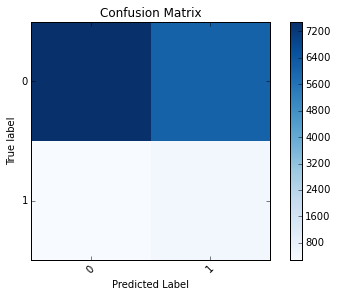

In [52]:
LogR_cm = confusion_matrix(y_test, LogR_predictions)
plot_confusion_matrix(LogR_cm)

In [53]:
LogR_fpr, LogR_tpr, LogR_thresholds = roc_curve(y_test, LogR_predictions)
print("Area Under Curve:", auc(LogR_fpr, LogR_tpr))

Area Under Curve: 0.589404324908


#####Gradient Boosting

In [ ]:
GB = GradientBoostingClassifier()
GB_params = {'n_estimators':[500,1000,2500,5000],
             'learning_rate':[0.001,0.005,0.01,0.05,0.1],
             'max_depth':[2,4,6,8]}
GB_GridSearch = GridSearchCV(GB, GB_params, n_jobs=-1, cv=10)

In [ ]:
GB_GridSearch.fit(X_train, y_train)

In [ ]:
GB_GridSearch.best_estimator_

Best parameters were found to be learning_rate=XXX, max_depth=X, n_estimators=XXXX

In [ ]:
#GB_GridSearch = GradientBoostingClassifier(learning_rate=XXXX, 
#                                           max_depth=X, 
#                                           n_estimators=XXXX)

In [ ]:
#GB_GridSearch.fit(X_train, y_train)

In [ ]:
#GB_predictions = GB_GridSearch.predict(X_test)

In [ ]:
#GB_cm = confusion_matrix(y_test, GB_predictions)
#plot_confusion_matrix(GB_cm)

In [ ]:
#GB_fpr, GB_tpr, GB_thresholds = roc_curve(y_test, GB_predictions)
#print("Area Under Curve:", auc(GB_fpr, GB_tpr))

#####Random Forests

In [ ]:
RF = RandomForestClassifier()
RF_parameters = {'n_estimators':[1000, 2500, 5000],
                 'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                 'criterion':('gini','entropy')}
RF_GridSearch = GridSearchCV(RF, RF_params, n_jobs=-1, cv=10)

In [ ]:
RF_GridSearch.fit(X_train, y_train)

In [ ]:
RF_GridSearch.best_estimator_

Best parameters were found to be criterion=XXXX, max_depth=X, n_estimators=XXXX

In [ ]:
#RF_GridSearch = RandomForestClassifier(criterion=XXXX, 
#                                       max_depth=X, 
#                                       n_estimators=XXXX, 
#                                       n_jobs=-1)

In [ ]:
#RF_GridSearch.fit(X_train, y_train)

In [ ]:
#RF_predictions = RF_GridSearch.predict(X_test)

In [ ]:
#RF_cm = confusion_matrix(y_test, RF_predictions)
#plot_confusion_matrix(RF_cm)

In [ ]:
#RF_fpr, RF_tpr, RF_thresholds = roc_curve(y_test, RF_predictions)
#print("Area Under Curve:", auc(RF_fpr, RF_tpr))

#####Summary

In [ ]:
#print("Logistic Regression AUC: ", auc(LR_fpr, LR_tpr))
#print("Gradient Boosting AUC: ", auc(GB_fpr, GB_tpr))
#print("Random Forests AUC: ", auc(RF_fpr, RF_tpr))

So given the output above, we can see that the XXXX model provided the most lift of any model, so it is the model that I would use for the classification portion of this exercise. Again, I chose to move forward with the output of the weighted logistic regression.

#####Feature Importance

It's always useful to see the feature importance of the chosen model and go back and add/remove features to see if that improves the accuracy. Sklearn's LogisticRegression package does not return the p-values for the features. Other packages like statsmodels.api could be used instead to get this information. Given my previous experience, randomforests tends to be the best model so I included the code to pull out feature importance below:

In [ ]:
#RF_Importance = pd.DataFrame(list(zip(X_train.columns, RF_GridSearch.feature_importances_)),
#             columns=['Feature', 'Importance'])
#RF_Importance.set_index('Feature', inplace=True)
#RF_Importance.sort_values('Importance', ascending=False, inplace=True)

In [ ]:
#RF_Importance

####Regression Model

My plan here is to take the output of the classification model and subset the full data into just the predicted donors, i.e. 'TARGET_B' = 1. Then plug those donors into a regression model to estimate 'TARGET_D'. I will  build this model using all 'TARGET_B' = 1 donors but only run it on the accounts from the test data that were predicted to donate. For the sake of time, I am just using linear regression, but randomforests, SGD, SVM, gradient boosting, etc. should also be attempted.

In [54]:
donor_data = model_data[model_data['TARGET_B']==1]
y = donor_data['TARGET_D']
cols_to_drop = ['TARGET_B','TARGET_D']
X = donor_data.drop(cols_to_drop, axis=1)

reg_scaler = preprocessing.StandardScaler().fit(X)

X = reg_scaler.transform(X)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [56]:
LR = LinearRegression()
LR.fit(X, y)
LR.score(X,y)

0.57078696609036284

In [57]:
LR_predictions = LR.predict(X)

In [58]:
print (mean_squared_error(y,LR_predictions))

66.4634054104


###TESTING

Loading the test data:

In [59]:
column_names = pd.read_csv('cup98VAL.txt',nrows=1)
column_names = column_names.columns.values.tolist()
test_data = pd.read_csv('cup98VAL.txt',names=column_names,skiprows=1,dtype={'NOEXCH':str})

Cleaning the test data:

This is sloppy as it is entirely possible that the testing dataset has different values such that pad.get_dummies will create features not found in the training set. I lucked out in this regard but would need to record to make more robust

In [60]:
test_data['MONTHS_SINCE_1st_GIFT'] = test_data.apply(lambda row: months_between(row['ODATEDW']),axis=1)
cols_to_drop = ['ODATEDW','OSOURCE','TCODE','STATE','ZIP','MAILCODE','PVASTATE','NOEXCH','RECINHSE','RECP3','RECPGVG','RECSWEEP'
                ,'AGEFLAG','CHILD03','CHILD07','CHILD12','CHILD18','NUMCHLD','DOB','MDMAUD_R','MDMAUD_F','MDMAUD_A','MDMAUD'
                ,'CLUSTER']
test_data.drop(cols_to_drop, axis=1, inplace=True)
test_data['AGE'].fillna(value=0,inplace=True)
test_data = pd.concat([test_data, pd.get_dummies(test_data['DOMAIN'],prefix='SES_')], axis=1)
cols_to_drop = ['DOMAIN','SES__ ']
test_data.drop(cols_to_drop, axis=1, inplace=True)
test_data['HOMEOWNR'] = test_data.apply(lambda row: binary_map(row['HOMEOWNR'],'H'),axis=1)
test_data = pd.concat([test_data, pd.get_dummies(test_data['INCOME'],prefix='INCOME_')], axis=1)
test_data = pd.concat([test_data, pd.get_dummies(test_data['WEALTH1'],prefix='WEALTH1_')], axis=1)
cols_to_drop = ['INCOME','WEALTH1']
test_data.drop(cols_to_drop, axis=1, inplace=True)
test_data = pd.concat([test_data, pd.get_dummies(test_data['GENDER'],prefix='GENDER_')], axis=1)
cols_to_drop = ['GENDER','GENDER__ ','GENDER__J','GENDER__U']
test_data.drop(cols_to_drop, axis=1, inplace=True)
cols_to_drop = ['MBCRAFT','MBGARDEN','MBBOOKS','MBCOLECT','MAGFAML','MAGFEM','MAGMALE','PUBGARDN','PUBCULIN','PUBHLTH'
                ,'PUBDOITY','PUBNEWFN','PUBPHOTO','PUBOPP','DATASRCE','LOCALGOV','STATEGOV','FEDGOV','SOLP3','SOLIH','MAJOR'
                ,'WEALTH2','GEOCODE','COLLECT1','BIBLE','CATLG','HOMEE','PETS','CDPLAY','STEREO','PCOWNERS','PHOTO','CRAFTS'
                ,'FISHER','GARDENIN','BOATS','WALKER','KIDSTUFF','CARDS','PLATES','LIFESRC','POP901','POP902','POP903'
                ,'POP90C1','POP90C2','POP90C3','POP90C4','POP90C5','ETH1','ETH2','ETH3','ETH4','ETH5','ETH6','ETH7'
                ,'ETH8','ETH9','ETH10','ETH11','ETH12','ETH13','ETH14','ETH15','ETH16','AGE901','AGE902','AGE903','AGE904'
                ,'AGE905','AGE906','AGE907','CHIL1','CHIL2','CHIL3','AGEC1','AGEC2','AGEC3','AGEC4','AGEC5','AGEC6','AGEC7'
                ,'CHILC1','CHILC2','CHILC3','CHILC4','CHILC5','HHAGE1','HHAGE2','HHAGE3','HHN1','HHN2','HHN3','HHN4','HHN5'
                ,'HHN6','MARR1','MARR2','MARR3','MARR4','HHP1','HHP2','DW1','DW2','DW3','DW4','DW5','DW6','DW7','DW8','DW9'
                ,'HV2','HV3','HV4','HU2','HU3','HU4','HU5','HHD1','HHD2','HHD3','HHD4','HHD5','HHD6','HHD7','HHD8','HHD9'
                ,'HHD10','HHD11','HHD12','ETHC1','ETHC2','ETHC3','ETHC4','ETHC5','ETHC6','HVP1','HVP2','HVP3','HVP4','HVP5'
                ,'HVP6','HUR1','HUR2','RHP1','RHP2','RHP3','RHP4','HUPA1','HUPA2','HUPA3','HUPA4','HUPA5','HUPA6','HUPA7','RP1'
                ,'RP2','RP3','RP4','MSA','ADI','DMA','IC2','IC3','IC4','IC6','IC7','IC8','IC9','IC10','IC11','IC12','IC13'
                ,'IC14','IC15','IC16','IC17','IC18','IC19','IC20','IC21','IC22','IC23','HHAS1','HHAS2','HHAS3','HHAS4','MC1'
                ,'MC2','MC3','TPE1','TPE2','TPE3','TPE4','TPE5','TPE6','TPE7','TPE8','TPE9','PEC1','PEC2','TPE10','TPE11'
                ,'TPE12','TPE13','LFC1','LFC2','LFC3','LFC4','LFC5','LFC6','LFC7','LFC8','LFC9','LFC10','OCC1','OCC2','OCC3'
                ,'OCC4','OCC5','OCC6','OCC7','OCC8','OCC9','OCC10','OCC11','OCC12','OCC13','EIC1','EIC2','EIC3','EIC4','EIC5'
                ,'EIC6','EIC7','EIC8','EIC9','EIC10','EIC11','EIC12','EIC13','EIC14','EIC15','EIC16','OEDC1','OEDC2','OEDC3'
                ,'OEDC4','OEDC5','OEDC6','OEDC7','EC1','EC2','EC3','EC4','EC5','EC6','EC7','EC8','SEC1','SEC2','SEC3','SEC4'
                ,'SEC5','AFC1','AFC2','AFC3','AFC4','AFC5','AFC6','VC1','VC2','VC3','VC4','ANC1','ANC2','ANC3','ANC4','ANC5'
                ,'ANC6','ANC7','ANC8','ANC9','ANC10','ANC11','ANC12','ANC13','ANC14','ANC15','POBC1','POBC2','LSC1','LSC2'
                ,'LSC3','LSC4','VOC1','VOC2','VOC3','HC1','HC2','HC3','HC4','HC5','HC6','HC7','HC8','HC9','HC10','HC11','HC12'
                ,'HC13','HC14','HC15','HC16','HC17','HC18','HC19','HC20','HC21','MHUC1','MHUC2','AC1','AC2']
test_data.drop(cols_to_drop, axis=1, inplace=True)
test_data['VETERANS'] = test_data.apply(lambda row: binary_map(row['VETERANS'],'Y'),axis=1)
test_data['PEPSTRFL'] = test_data.apply(lambda row: binary_map(row['PEPSTRFL'],'X'),axis=1)
for i in ('F','N','A','L','I'):
    test_data['RFA_3_' + i] = test_data.apply(lambda row: rfa_map(row['RFA_3'],0,i),axis=1)
test_data = pd.concat([test_data, pd.get_dummies(test_data['RFA_2F'],prefix='RFA_2F_')], axis=1)
test_data.drop('MAXADATE', axis=1, inplace=True)
test_data['SUM_GIFT_AMT'] = test_data.ix[:,'RAMNT_3':'RAMNT_24'].sum(axis=1).fillna(0)
test_data['NUM_PROMOTIONS'] = test_data.ix[:,'ADATE_3':'ADATE_24'].count(axis=1)
test_data['NUM_DONATIONS'] = test_data.ix[:,'RAMNT_3':'RAMNT_24'].count(axis=1)
test_data['AVG_GIFT_AMT'] = test_data['SUM_GIFT_AMT'] / test_data['NUM_DONATIONS'].map(lambda x: max(x,1))
test_data['NUM_CARD_PROMO'] = test_data.ix[:,['ADATE_3','ADATE_5','ADATE_14','ADATE_24']].count(axis=1)
test_data['NUM_CARD_DONAT'] = test_data.ix[:,['RAMNT_3','RAMNT_5','RAMNT_14','RAMNT_24']].count(axis=1)
test_data['CARD_GIFT_AMT'] = test_data.ix[:,['RAMNT_3','RAMNT_5','RAMNT_14','RAMNT_24']].sum(axis=1).fillna(0)
test_data['AVG_CARD_AMT'] = test_data['CARD_GIFT_AMT'] / test_data['NUM_CARD_DONAT'].map(lambda x: max(x,1))
cols_to_drop = ['ADATE_2','ADATE_3','ADATE_4','ADATE_5','ADATE_6','ADATE_7','ADATE_8','ADATE_9','ADATE_10','ADATE_11','ADATE_12'
                ,'ADATE_13','ADATE_14','ADATE_15','ADATE_16','ADATE_17','ADATE_18','ADATE_19','ADATE_20','ADATE_21','ADATE_22'
                ,'ADATE_23','ADATE_24','RFA_2','RFA_3','RFA_4','RFA_5','RFA_6','RFA_7','RFA_8','RFA_9','RFA_10','RFA_11'
                ,'RFA_12','RFA_13','RFA_14','RFA_15','RFA_16','RFA_17','RFA_18','RFA_19','RFA_20','RFA_21','RFA_22','RFA_23'
                ,'RFA_24','RFA_2F__4','RFA_2R','RFA_2F','RFA_2A','RDATE_3','RDATE_4','RDATE_5','RDATE_6','RDATE_7','RDATE_8'
                ,'RDATE_9','RDATE_10','RDATE_11','RDATE_12','RDATE_13','RDATE_14','RDATE_15','RDATE_16','RDATE_17','RDATE_18'
                ,'RDATE_19','RDATE_20','RDATE_21','RDATE_22','RDATE_23','RDATE_24','RAMNT_3','RAMNT_4','RAMNT_5','RAMNT_6'
                ,'RAMNT_7','RAMNT_8','RAMNT_9','RAMNT_10','RAMNT_11','RAMNT_12','RAMNT_13','RAMNT_14','RAMNT_15','RAMNT_16'
                ,'RAMNT_17','RAMNT_18','RAMNT_19','RAMNT_20','RAMNT_21','RAMNT_22','RAMNT_23','RAMNT_24']
test_data.drop(cols_to_drop, axis=1, inplace=True)
test_data['MONTHS_SINCE_LAST_GIFT'] = test_data.apply(lambda row: months_between(row['LASTDATE']),axis=1)
test_data.drop(['LASTDATE'],axis=1,inplace=True)
test_data['GIFT_RANGE'] = test_data['MAXRAMNT'] - test_data['MINRAMNT']
cols_to_drop = ['CARDGIFT','MINRAMNT','MINRDATE','MAXRDATE','FISTDATE','NEXTDATE','TIMELAG','HPHONE_D','CLUSTER2','GEOCODE2']
test_data.drop(cols_to_drop, axis=1, inplace=True)

Running the models on the test data:

In [61]:
test_run_data = test_data.copy()

class_output = pd.DataFrame(test_run_data['CONTROLN'])
class_X = test_run_data.drop('CONTROLN', axis=1)
class_X = class_scaler.transform(class_X)

In [62]:
LogR_class_pred = LogR_GridSearch.predict(class_X)

In [63]:
test_run_data['TARGET_B_PREDICTIONS']=LogR_class_pred

In [64]:
amt_reg_input = test_run_data[test_run_data['TARGET_B_PREDICTIONS']==1]
cols_to_drop = ['TARGET_B_PREDICTIONS','CONTROLN']
amt_reg_input = amt_reg_input.drop(cols_to_drop, axis=1)
reg_X = reg_scaler.transform(amt_reg_input)

In [65]:
LR_amt_pred = LR.predict(reg_X)

In [66]:
amt_reg_input['TARGET_D_PREDICT'] = LR_amt_pred
fin_analysis = test_run_data.join(amt_reg_input['TARGET_D_PREDICT'])
class_output['TARGET_D_PREDICT'] = fin_analysis['TARGET_D_PREDICT'].fillna(0)

Writing the output file:

In [67]:
class_output.to_csv('ml_exercise_output.csv',index=False)

###TAKE-AWAYS

With more time, I would like to run the randomforest and gradientboosting classification models to completion as well as attempt a SVM model. The regression model could also be improved by trying other models such as those used for the classification portion (just their regression forms). 

I would also like to have produced a summary showing the improvements produced by the model in terms of improving profit. The beginning of this summary can be seen below:

In [76]:
revenue = round(full_data['TARGET_D'].sum())
costs = len(full_data)*0.68
print (revenue)
print (costs)
print ('Current Profits are: ' + str(revenue-costs))

75669.0
64880.16
Current Profits are: 10788.84
